In [13]:
# grab credentials for SQL login from a json file to not leak data
import json

with open('/Users/vanes/ThisPC/Documents/GitHub/credentials.json') as f:
    data = json.load(f)
    username = data['username'] 
    password = data['password'] 

In [14]:
# connect jupyter notebook to SQL server
import pyodbc

conn2 = pyodbc.connect("Driver={SQL Server};"
                       "Server=FALCON-HQ\SQLEXPRESS;"
                       "Database=DA320;"
                       "Trusted_Connection=yes;"
                       "UID" + username + ";"
                       "PWD" + password)

In [22]:
# importing sql query into jupyter notebook 
cursor = conn2.cursor()
sql = "SELECT YEAR(release_date), AVG(score) FROM MetacriticMovies WHERE YEAR(release_date) BETWEEN 2010 AND 2020 GROUP BY YEAR(release_date) ORDER BY YEAR(release_date) desc" 
cursor.execute(sql)
rows = cursor.fetchall()
print(rows) 

[(2020, 62), (2019, 62), (2018, 62), (2017, 62), (2016, 60), (2015, 58), (2014, 56), (2013, 56), (2012, 57), (2011, 57), (2010, 57)]


Text(0, 0.5, 'Average Score')

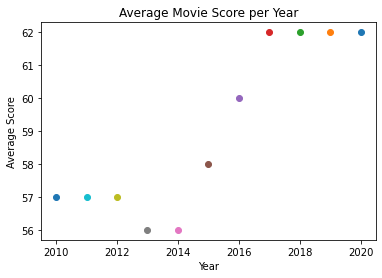

In [24]:
# import library for charting
import matplotlib.pyplot as plt

# create histogram
for row in rows: 
    plt.plot(row[0], row[1], 'o')
    
# label histogram 
plt.title('Average Movie Score per Year')
plt.xlabel('Year')
plt.ylabel('Average Score')

# add some text segments to Jupyter describing the question you ask
The question the I ended up with was: "What is the average movie score per year between 2010 and 2020?" I chose this question after querying the database several times and found an interesting trend. The average for every year was within 6 metacrtic points and the trend of the last four years was the same score. It seemed interesting. 

My original ideas for charting were around wanting to do a density plot for the wordcount in the description for each movie. I wanted to plot the numbers per year. After a lot of failed attempts this turned out to be overly ambitious for what I know of coding. It's an idea that I really like and I think I will try to implement something similar with a database project I am attempting to work on in my free time. 

# add some text after the chart showing your thoughts about the result
My thoughts about the data didn't really change after seeing the graph but I believe it does show the data very well. 
I thought the trending that showed was very interesting. From 2010-2012 the score remained stagnant with a score of 57. From 2013-2014 the score went down to 56 points, from then on it was a sharp incline in score in 2015-2017, where it then stagnated again where the score stayed at 62 from 2017-2020. 

Some ideas I had for why this may have occured is that perhaps there was an abundance of movies released in 2013-2014 which drive the quality down. Perhaps it was the other way around, and the years with the higher scorees were the years that more movies were released. Another possible reason could be that the years of higher scores, more specifically in recent years, could have been years that popular large franhises released more movies, such as Marvel Studios. 